# Sales Data Analysis Project

### This Script containns the following:
#### 1. Import libraries and dataset.
#### 2. Data Preprocessing (i.e handling missing & duplicate values)
#### 3. Determine which month yeilds maximum sales.
#### 4. Deteremine Cities generating most of the revenue.
#### 5. Bestselling Products and why?
#### 6. Determine Products bought together to support recommendation system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Installing library to read feather file
!pip install pyarrow

In [3]:
df=pd.read_feather(r'C:\Users\User01\Sales Data Analysis\01 Data\Original Data\Sales_data.ftr')

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#chechking for missing values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#Dropping all rows with missing value
all_data=df.dropna(how='all')

In [7]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
#Checking for duplicate values
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [9]:
all_data=all_data.drop_duplicates()

In [10]:
all_data.shape

(185687, 6)

In [11]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Let us find out which month has maximum sale.

In [12]:
#Extracting Month from Order Date
all_data['Order Date'][0].split('/')[0]

'04'

In [13]:
#Defining function to return months
def return_month(x):
    return x.split('/')[0]

In [14]:
all_data['Month']=all_data['Order Date'].apply(return_month)

In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [16]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [17]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185686

In [18]:
all_data=all_data[~filter]

In [19]:
all_data.shape

(185686, 7)

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [21]:
all_data['Month']=all_data['Month'].astype(int)

In [22]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [23]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [24]:
#Calculating Sales by multiplying Quantity ordered and Price each
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
all_data.groupby('Month')['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

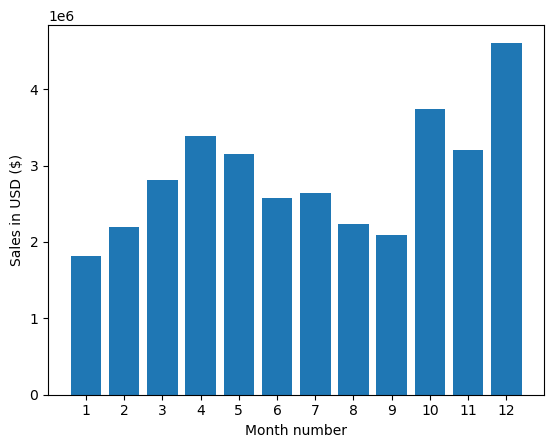

In [26]:
#Plot Bar Chart
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [27]:
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\Top_Months.png')

<Figure size 640x480 with 0 Axes>

### December month has maximum sales due to Christmas and New Year Eve.

### Which City has maximum orders?

In [28]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [29]:
def city(x):
    return x.split(',')[1]

In [30]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [31]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14863
 Austin            9890
 Boston           19901
 Dallas           14797
 Los Angeles      29564
 New York City    24847
 Portland         12449
 San Francisco    44662
 Seattle          14713
Name: city, dtype: int64

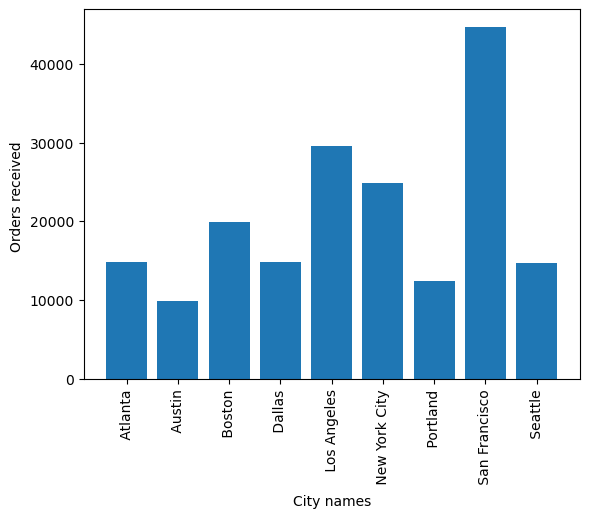

<Figure size 640x480 with 0 Axes>

In [61]:
#Plot graph
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Orders received ')
plt.xlabel('City names')
plt.show()
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\Top_city.png')

### San Francisco, Los Angeles and New York City are top 3 cities with maximum sales in United States.

### What time should we display advertisements to maximise for product purchase?

In [34]:
#Converting to datetime object to extract each component of date
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [35]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

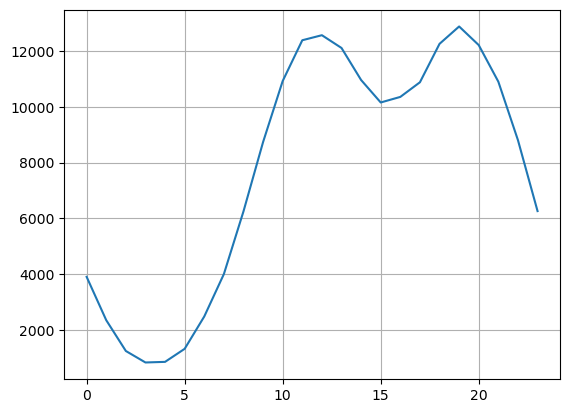

In [36]:
plt.grid()
plt.plot(keys,hour)

### The above graph indicates that between 12pm and 7pm is probably the best time to advertise to maximise product purchase.

### What product are sold the most and Why?

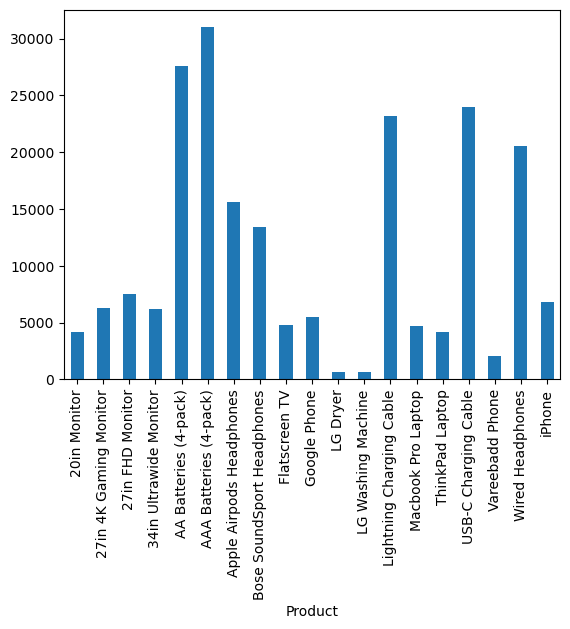

In [37]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\Top_Products.png')

In [38]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [39]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\User01\AppData\Local\Temp\ipykernel_12768\1964950238.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

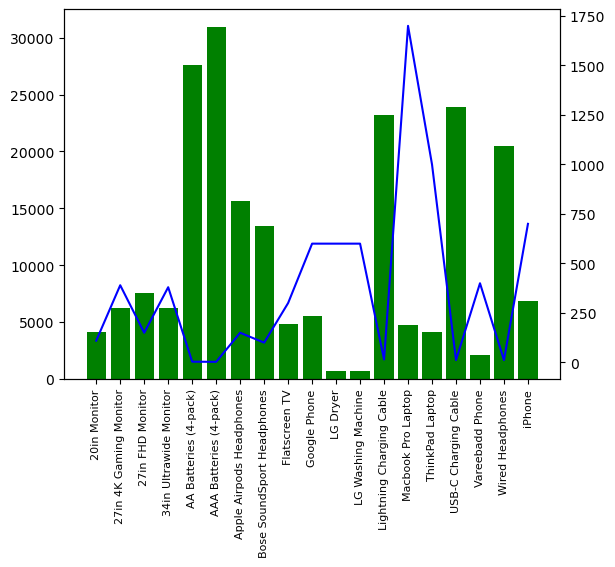

In [40]:
#Plot Graph
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [41]:
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\Products.png')

<Figure size 640x480 with 0 Axes>

### The top selling product is 'AAA Batteries' and the top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [42]:
all_data.shape

(185686, 10)

### What products are most often sold together?

In [43]:
df1=all_data[all_data['Order ID'].duplicated(keep=False)]
df1.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17


In [44]:
most_sold_product=df1['Product'].value_counts()[0:5].index

In [45]:
most_sold_product

Index(['USB-C Charging Cable', 'iPhone', 'Lightning Charging Cable',
       'Google Phone', 'Wired Headphones'],
      dtype='object')

In [46]:
most_sold_product_df=df1[df1['Product'].isin(most_sold_product)]

In [47]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17


In [48]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      Google Phone                 99
       Lightning Charging Cable     94
       USB-C Charging Cable        123
       Wired Headphones            108
       iPhone                      116
2      Google Phone                120
       Lightning Charging Cable    102
       USB-C Charging Cable        133
       Wired Headphones            107
       iPhone                      110
3      Google Phone                136
       Lightning Charging Cable    158
       USB-C Charging Cable        160
       Wired Headphones            120
       iPhone                      148
4      Google Phone                169
       Lightning Charging Cable    157
       USB-C Charging Cable        211
       Wired Headphones            144
       iPhone                      194
5      Google Phone                148
       Lightning Charging Cable    174
       USB-C Charging Cable        191
       Wired Headphones            158
       iPhone                   

In [49]:
#Creating Pivot table using unstack function
Most_Sold_Pivot=most_sold_product_df.groupby(['Month','Product']).size().unstack()

<Axes: xlabel='Month'>

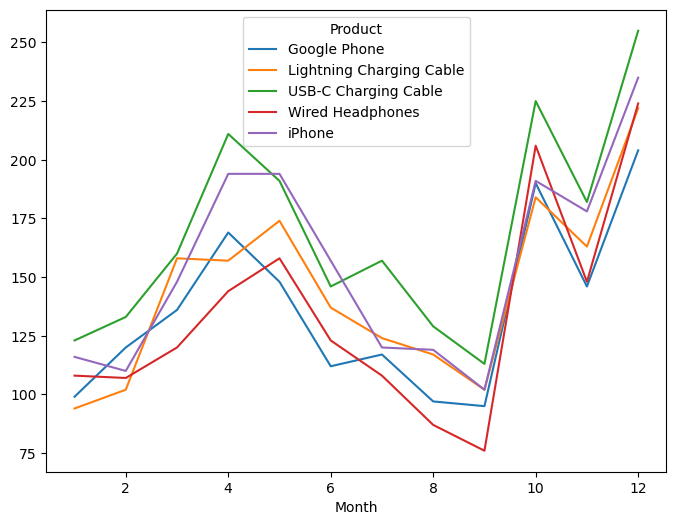

In [50]:
Most_Sold_Pivot.plot(figsize=(8,6))

In [51]:
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\ProductsvsMonth.png')

<Figure size 640x480 with 0 Axes>

In [52]:
df2=all_data[all_data['Order ID'].duplicated(keep=False)]
df2.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11
129,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,10
130,176681,ThinkPad Laptop,1,999.99,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,999.99,Seattle,10


In [53]:
#create grouped column 
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\User01\AppData\Local\Temp\ipykernel_12768\372830411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [54]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"


In [55]:
df2.shape

(14128, 11)

In [56]:
#lets drop out all duplicate Order ID
df3 = df2.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='Grouped'>

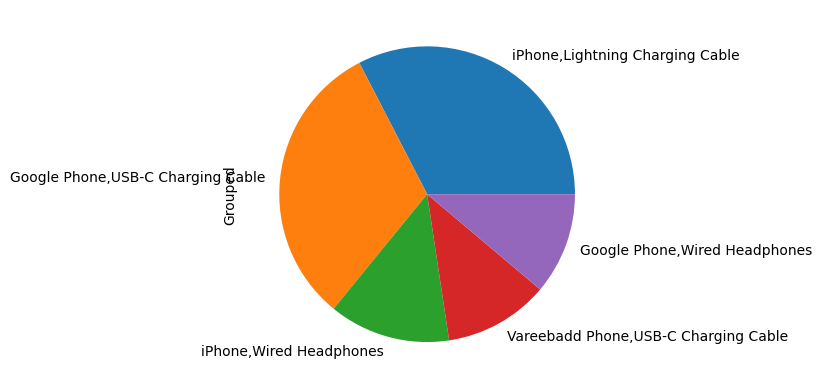

In [57]:
df3['Grouped'].value_counts()[0:5].plot.pie()

In [58]:
# Save the plot to a file
plt.savefig('C:\\Users\\User01\\Sales Data Analysis\\03 Visualizations\\Grouped_Products.png')

<Figure size 640x480 with 0 Axes>

In [59]:
path=('C:\\Users\\User01\\Sales Data Analysis')
import os

In [60]:
# Exporting final data set as pkl. format
df2.to_pickle(os.path.join(path, '01 Data', 'Prepared Data', 'final_data.pkl'))